Status Code: 200
Response JSON: {'took': 2042, 'objects': [[{'xmin': 921.0, 'ymin': 519.0, 'xmax': 1492.0, 'ymax': 1087.0, 'conf': 0.4728253483772278, 'label': 'person'}, {'xmin': 460.0, 'ymin': 582.0, 'xmax': 1188.0, 'ymax': 1209.0, 'conf': 0.32650226354599, 'label': 'dog'}]]}


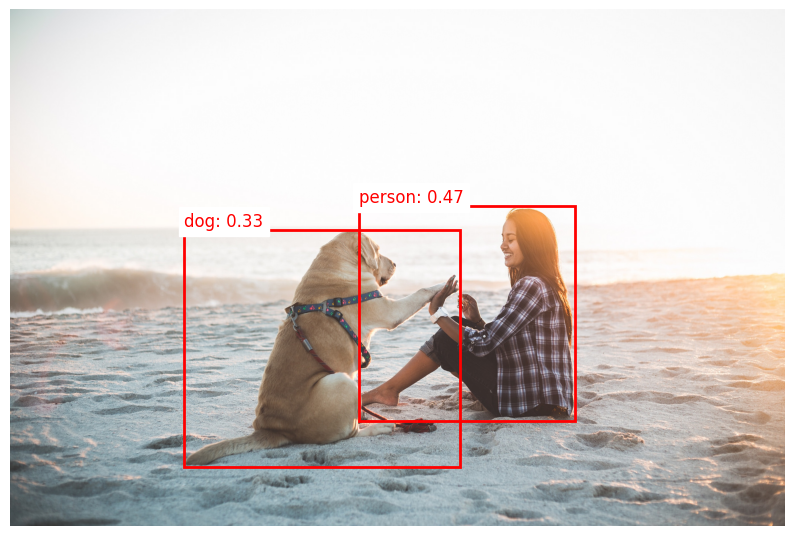

In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the URL of the API endpoint
url = "http://10.0.0.132:8000/inf_predict"

# Create a sample payload
payload = {
    "model_id": "OmDet-Turbo_tiny_SWIN_T",
    "data": ["https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg"],
    "src_type": "url",
    "task": "detection_task",
    "labels": ["dog", "person"],
    "threshold": 0.1,
    "nms_threshold": 0.5
}

# Send a POST request to the API
response = requests.post(url, json=payload)

# Print the response from the server
print("Status Code:", response.status_code)
response_data = response.json()
print("Response JSON:", response_data)

# Extract objects and image URL
image_url = payload["data"][0]
objects = response_data['objects'][0]

# Fetch the image
image_response = requests.get(image_url)
image = Image.open(BytesIO(image_response.content))

# Visualize the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
ax = plt.gca()

# Draw each bounding box
for obj in objects:
    xmin, ymin, xmax, ymax = obj['xmin'], obj['ymin'], obj['xmax'], obj['ymax']
    label = obj['label']
    confidence = obj['conf']
    
    # Draw rectangle
    rect = patches.Rectangle(
        (xmin, ymin), xmax - xmin, ymax - ymin,
        linewidth=2, edgecolor='red', facecolor='none'
    )
    ax.add_patch(rect)
    
    # Add label text
    plt.text(
        xmin, ymin - 10,
        f"{label}: {confidence:.2f}",
        color='red', fontsize=12, backgroundcolor='white'
    )

# Show the plot
plt.axis('off')
plt.show()
